In [73]:
import torch
import numpy as np
import matplotlib.pyplot as plt


In [26]:
N = 250
M = 1000
K = 5
p_prior = 0.1
code = 0
steps = 5000
net_depth = 2
net_width = 1
num_samples = 99

pps = '{:.3f}'.format(p_prior).replace('.', '')
Ns = str(N)
Ms = str(M)
Ks = str(K)
steps = str(steps)
net_depth = str(net_depth)
net_width = str(net_width)
code = str(code)

In [27]:
p = 0.495
ps = '{:.3f}'.format(p).replace('.', '')

In [28]:
path_ = '/home/rodrigo/Dropbox/DOC/van_error_codes/models/N_%s_M_%s_K_%s_p_prior_%s_steps_%s/' % (Ns, Ms, Ks, pps, steps)

In [29]:
PATH = path_ + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_net_depth_%s_net_width_%s_steps_%s/' % (Ns, Ms, Ks, ps, pps, net_depth, net_width, steps)

In [47]:
p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3]

In [126]:
message_ = []
decoded_ = []

p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25]

for j, p in enumerate(p_list):


    ps = '{:.3f}'.format(p).replace('.', '')
    PATH = path_ + 'model_N_%s_M_%s_K_%s_p_%s_p_prior_%s_net_depth_%s_net_width_%s_steps_%s/' % (Ns, Ms, Ks, ps, pps, net_depth, net_width, steps)
    message_.append(torch.load(PATH + 'message_N_%s_M_%s_K_%s_p_%s_p_prior_%s.pt' % (Ns, Ms, Ks, ps, pps)))
    decoded_.append(torch.load(PATH + 'av_sample_N_%s_M_%s_K_%s_p_%s_p_prior_%s_num_samples_%s.pt' % (Ns, Ms, Ks, ps, pps, str(num_samples))))

In [127]:
for j in range(len(decoded_)):
    for k in range(len(decoded_)):
        if j != k:
            sum_ = torch.sum(decoded_[j] != decoded_[k]).item() 
            ratio = sum_ / (decoded_[j].shape[0]*decoded_[j].shape[1])
            print('decoded %d, decoded %d, different elements: %d, ratio= %.6f' % (j, k, sum_, ratio))

decoded 0, decoded 1, different elements: 495, ratio= 0.001980
decoded 0, decoded 2, different elements: 514, ratio= 0.002056
decoded 0, decoded 3, different elements: 505, ratio= 0.002020
decoded 0, decoded 4, different elements: 525, ratio= 0.002100
decoded 0, decoded 5, different elements: 478, ratio= 0.001912
decoded 0, decoded 6, different elements: 507, ratio= 0.002028
decoded 0, decoded 7, different elements: 474, ratio= 0.001896
decoded 0, decoded 8, different elements: 503, ratio= 0.002012
decoded 1, decoded 0, different elements: 495, ratio= 0.001980
decoded 1, decoded 2, different elements: 473, ratio= 0.001892
decoded 1, decoded 3, different elements: 514, ratio= 0.002056
decoded 1, decoded 4, different elements: 482, ratio= 0.001928
decoded 1, decoded 5, different elements: 489, ratio= 0.001956
decoded 1, decoded 6, different elements: 514, ratio= 0.002056
decoded 1, decoded 7, different elements: 501, ratio= 0.002004
decoded 1, decoded 8, different elements: 478, ratio= 0

In [128]:
for j in range(len(message_)):
    for k in range(len(message_)):
        if j != k:
            sum_ = torch.sum(message_[j] != message_[k]).item() 
            ratio = sum_ / (message_[j].shape[0]*message_[j].shape[1])
            print('mesage %d, message %d, different elements: %d, ratio= %.6f' % (j, k, sum_, ratio))

mesage 0, message 1, different elements: 44851, ratio= 0.179404
mesage 0, message 2, different elements: 45083, ratio= 0.180332
mesage 0, message 3, different elements: 45005, ratio= 0.180020
mesage 0, message 4, different elements: 44818, ratio= 0.179272
mesage 0, message 5, different elements: 45124, ratio= 0.180496
mesage 0, message 6, different elements: 44954, ratio= 0.179816
mesage 0, message 7, different elements: 44965, ratio= 0.179860
mesage 0, message 8, different elements: 44771, ratio= 0.179084
mesage 1, message 0, different elements: 44851, ratio= 0.179404
mesage 1, message 2, different elements: 45122, ratio= 0.180488
mesage 1, message 3, different elements: 44860, ratio= 0.179440
mesage 1, message 4, different elements: 44807, ratio= 0.179228
mesage 1, message 5, different elements: 44945, ratio= 0.179780
mesage 1, message 6, different elements: 44979, ratio= 0.179916
mesage 1, message 7, different elements: 44920, ratio= 0.179680
mesage 1, message 8, different elements:

In [129]:
for j in range(len(message_)):

    sum_ = torch.sum(message_[j] == decoded_[j]).item()
    ratio = sum_ / (message_[j].shape[0]*message_[j].shape[1])
    print('message %d, message %d, equal elements: %d, overlap= %.6f' % (j, j, sum_, ratio))


message 0, message 0, equal elements: 224712, overlap= 0.898848
message 1, message 1, equal elements: 224734, overlap= 0.898936
message 2, message 2, equal elements: 224405, overlap= 0.897620
message 3, message 3, equal elements: 224752, overlap= 0.899008
message 4, message 4, equal elements: 224749, overlap= 0.898996
message 5, message 5, equal elements: 224462, overlap= 0.897848
message 6, message 6, equal elements: 224637, overlap= 0.898548
message 7, message 7, equal elements: 224493, overlap= 0.897972
message 8, message 8, equal elements: 224730, overlap= 0.898920


In [130]:
message_[0].shape[0]*message_[0].shape[1]

250000

In [75]:
p_list = np.array([0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25, 0.225, 0.2, 0.1])
beta_list = 0.5*np.log( (1. - p_list) / p_list)

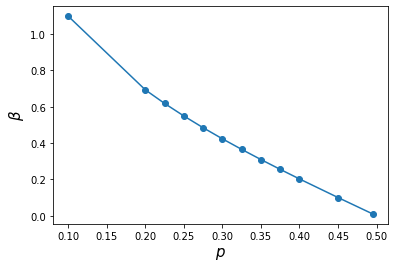

In [82]:
plt.plot(p_list, beta_list, 'o-')
plt.ylabel('$\\beta$', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.show()

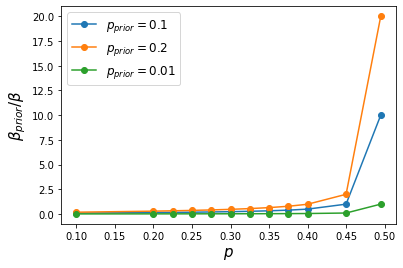

In [91]:
plt.plot(p_list, 0.1/ beta_list, 'o-', label= '$p_{prior} = 0.1$')
plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

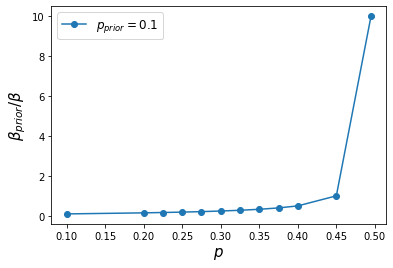

In [104]:
plt.plot(p_list, 0.1/ beta_list, 'o-', label= '$p_{prior} = 0.1$')
#plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
#plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

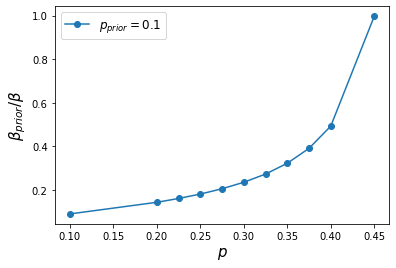

In [103]:
plt.plot(p_list[1:], 0.1/ beta_list[1:], 'o-', label= '$p_{prior} = 0.1$')
#plt.plot(p_list, 0.2/ beta_list, 'o-', label= '$p_{prior} = 0.2$')
#plt.plot(p_list, 0.01/ beta_list, 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

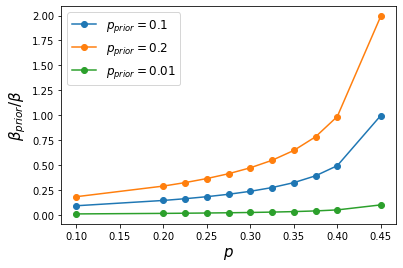

In [105]:
plt.plot(p_list[1:], 0.1/ beta_list[1:], 'o-', label= '$p_{prior} = 0.1$')
plt.plot(p_list[1:], 0.2/ beta_list[1:], 'o-', label= '$p_{prior} = 0.2$')
plt.plot(p_list[1:], 0.01/ beta_list[1:], 'o-', label= '$p_{prior} = 0.01$')
plt.ylabel('$\\beta_{prior} / \\beta $', fontsize=15)
plt.xlabel('$p$', fontsize=15)
plt.legend(fontsize=12)
plt.show()

In [107]:
message_[0].shape

torch.Size([1000, 250])

In [124]:
len(message_)

7

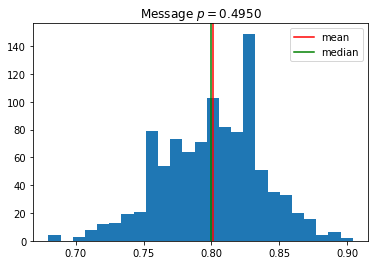

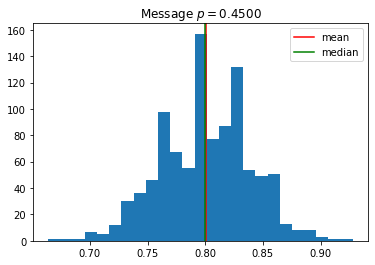

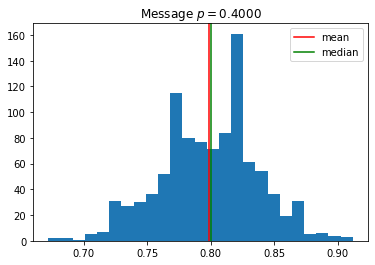

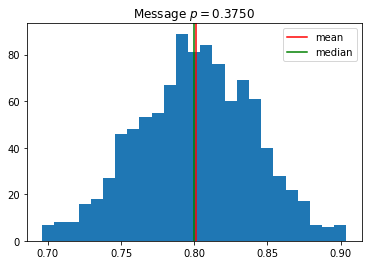

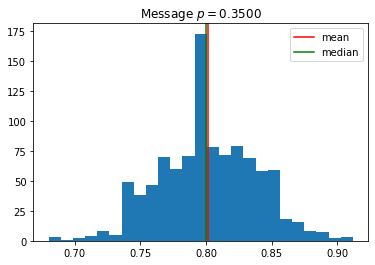

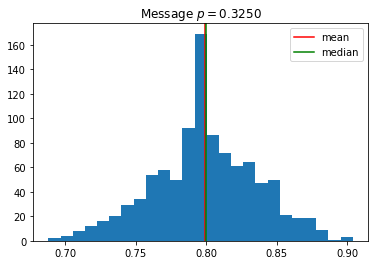

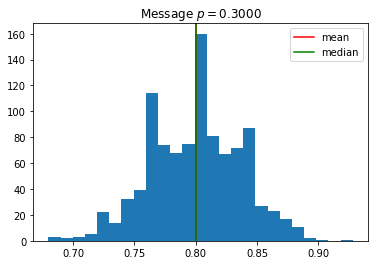

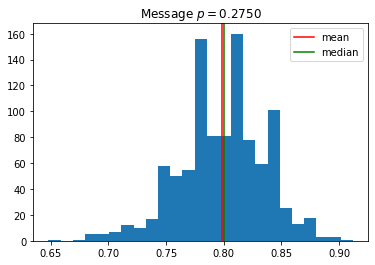

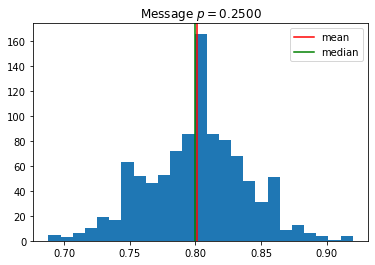

In [131]:
p_list = [0.495, 0.45, 0.4, 0.375, 0.35, 0.325, 0.3, 0.275, 0.25]

for j, p in enumerate(p_list):
    mag_set = message_[j].sum(dim=1) / message_[j].shape[1]
    plt.hist(mag_set.numpy(), bins= 25)
    plt.axvline(mag_set.numpy().mean(),  label='mean', color= 'red')
    plt.axvline(np.median(mag_set.numpy()),  label='median', color= 'green')    
    plt.title('Message $p= %.4f$' % p)
    plt.legend()
    plt.show()

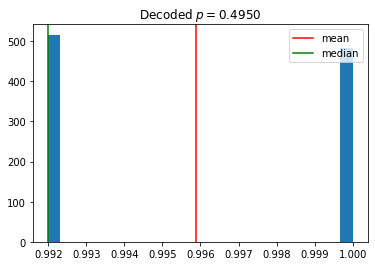

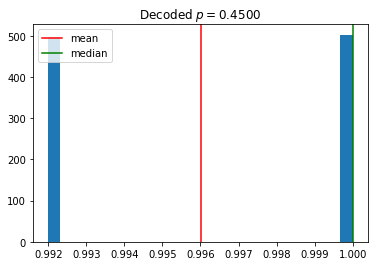

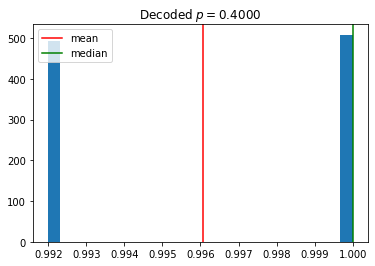

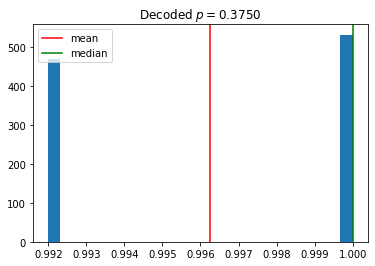

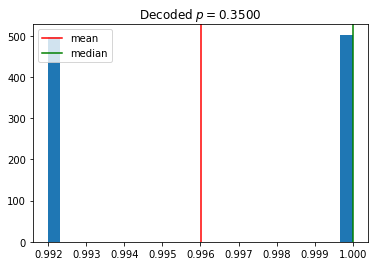

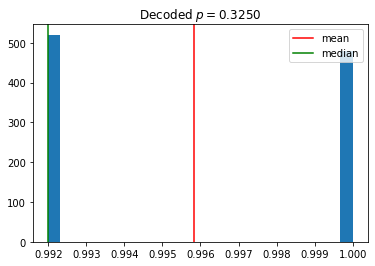

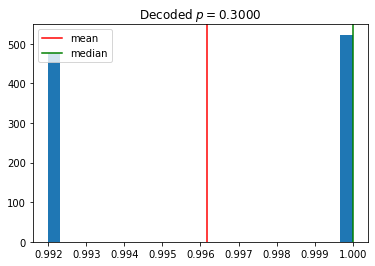

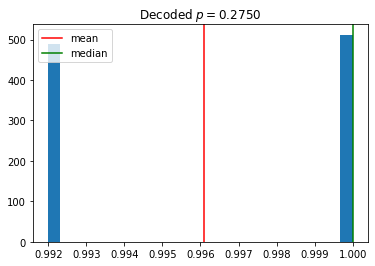

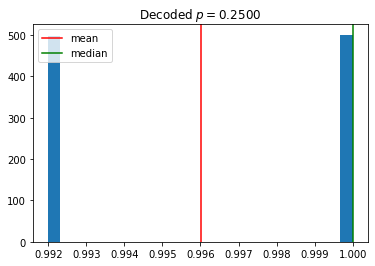

In [132]:
for j, p in enumerate(p_list):
    mag_set = decoded_[j].sum(dim=1) / dec oded_[j].shape[1]
    plt.hist(mag_set.numpy(), bins= 25)
    plt.axvline(mag_set.numpy().mean(),  label='mean', color= 'red')
    plt.axvline(np.median(mag_set.numpy()),  label='median', color= 'green')    
    plt.title('Decoded $p= %.4f$' % p)
    plt.legend()
    plt.show()

In [133]:
0.8 / 0.996

0.8032128514056225

In [112]:
mag_set.numpy()

array([0.856, 0.816, 0.744, 0.728, 0.832, 0.84 , 0.832, 0.832, 0.808,
       0.76 , 0.872, 0.904, 0.816, 0.816, 0.808, 0.752, 0.768, 0.768,
       0.84 , 0.736, 0.808, 0.816, 0.776, 0.72 , 0.76 , 0.8  , 0.824,
       0.808, 0.784, 0.824, 0.848, 0.824, 0.8  , 0.832, 0.8  , 0.816,
       0.8  , 0.832, 0.824, 0.856, 0.84 , 0.744, 0.792, 0.792, 0.792,
       0.8  , 0.768, 0.856, 0.776, 0.848, 0.808, 0.84 , 0.784, 0.776,
       0.76 , 0.816, 0.72 , 0.816, 0.816, 0.816, 0.84 , 0.776, 0.784,
       0.872, 0.792, 0.784, 0.864, 0.76 , 0.832, 0.832, 0.776, 0.792,
       0.816, 0.8  , 0.824, 0.76 , 0.784, 0.808, 0.736, 0.856, 0.728,
       0.728, 0.808, 0.816, 0.856, 0.824, 0.84 , 0.872, 0.792, 0.8  ,
       0.824, 0.888, 0.872, 0.736, 0.824, 0.848, 0.76 , 0.824, 0.744,
       0.824, 0.824, 0.8  , 0.856, 0.848, 0.792, 0.8  , 0.744, 0.856,
       0.856, 0.784, 0.856, 0.848, 0.744, 0.72 , 0.792, 0.76 , 0.8  ,
       0.832, 0.784, 0.816, 0.872, 0.832, 0.816, 0.8  , 0.76 , 0.808,
       0.776, 0.784,

In [31]:
message = torch.load(PATH + 'message_N_%s_M_%s_K_%s_p_%s_p_prior_%s.pt' % (Ns, Ms, Ks, ps, pps))

In [32]:
message

tensor([[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1., -1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1., -1., -1.],
        ...,
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]])

In [16]:
decoding = torch.load(PATH + 'av_sample_N_%s_M_%s_K_%s_p_%s_p_prior_%s_num_samples_%s.pt' % (Ns, Ms, Ks, ps, pps, str(num_samples)))

In [45]:
decoding

tensor([[ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        ...,
        [-1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  ...,  1.,  1.,  1.]], requires_grad=True)

In [46]:
message[0]

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
         1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  

In [47]:
decoding[0]

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  

In [48]:
print(torch.sum(decoding[0]).item())
print(torch.sum(message[0]).item())

248.0
214.0


In [49]:
for j in range(message.shape[0]):
    print('-- Message #', j)
    print('Message # minus= ', N - torch.sum(message[j]).item())
    print('Decoded # minus= ', N - torch.sum(decoding[j]).item())

-- Message # 0
Message # minus=  36.0
Decoded # minus=  2.0
-- Message # 1
Message # minus=  66.0
Decoded # minus=  4.0
-- Message # 2
Message # minus=  44.0
Decoded # minus=  2.0
-- Message # 3
Message # minus=  80.0
Decoded # minus=  4.0
-- Message # 4
Message # minus=  42.0
Decoded # minus=  4.0
-- Message # 5
Message # minus=  72.0
Decoded # minus=  2.0
-- Message # 6
Message # minus=  40.0
Decoded # minus=  4.0
-- Message # 7
Message # minus=  48.0
Decoded # minus=  2.0
-- Message # 8
Message # minus=  50.0
Decoded # minus=  2.0
-- Message # 9
Message # minus=  54.0
Decoded # minus=  2.0
-- Message # 10
Message # minus=  64.0
Decoded # minus=  4.0
-- Message # 11
Message # minus=  42.0
Decoded # minus=  4.0
-- Message # 12
Message # minus=  34.0
Decoded # minus=  4.0
-- Message # 13
Message # minus=  58.0
Decoded # minus=  2.0
-- Message # 14
Message # minus=  56.0
Decoded # minus=  2.0
-- Message # 15
Message # minus=  38.0
Decoded # minus=  2.0
-- Message # 16
Message # minus=  

In [9]:
a = torch.randn([100, 250])
a

tensor([[-0.5704,  1.1750,  1.6236,  ...,  0.1473, -0.2354, -0.5454],
        [-0.0866,  0.6756, -0.7912,  ..., -0.2102, -0.5950,  0.6314],
        [ 0.2093, -0.4263,  0.3272,  ...,  0.5397, -0.3871,  0.4739],
        ...,
        [ 0.3655, -1.3062, -0.8157,  ...,  1.1752, -0.8407,  3.1668],
        [-1.8087, -1.1327, -1.7910,  ..., -0.1154,  0.0398, -2.4613],
        [-0.5371, -0.3625,  1.8700,  ..., -0.5005, -1.3823, -0.2369]])

In [10]:
b = torch.randn([100, 250])
b

tensor([[-0.2390, -0.2785,  1.0199,  ..., -0.0167,  0.1198,  0.8630],
        [ 0.0891, -0.2012,  0.5248,  ..., -0.1707, -0.5210, -1.9808],
        [ 1.1270, -0.9241,  1.8538,  ...,  1.2409, -1.8029,  1.4389],
        ...,
        [ 0.6481,  0.0441,  0.3412,  ..., -1.0544,  0.4499,  0.1797],
        [ 0.1634, -1.9787,  0.9196,  ...,  0.9916, -0.4771, -0.7761],
        [ 0.7756,  0.0743,  0.2076,  ...,  0.6047, -1.1706, -0.1754]])

In [11]:
b = torch.sum(b, a)

TypeError: sum() received an invalid combination of arguments - got (Tensor, Tensor), but expected one of:
 * (Tensor input, torch.dtype dtype)
      didn't match because some of the arguments have invalid types: (Tensor, !Tensor!)
 * (Tensor input, tuple of ints dim, bool keepdim, torch.dtype dtype, Tensor out)


In [12]:
b.add_(a)  

tensor([[-8.0943e-01,  8.9646e-01,  2.6435e+00,  ...,  1.3051e-01,
         -1.1559e-01,  3.1752e-01],
        [ 2.4477e-03,  4.7443e-01, -2.6635e-01,  ..., -3.8083e-01,
         -1.1161e+00, -1.3494e+00],
        [ 1.3362e+00, -1.3504e+00,  2.1809e+00,  ...,  1.7805e+00,
         -2.1901e+00,  1.9129e+00],
        ...,
        [ 1.0137e+00, -1.2621e+00, -4.7442e-01,  ...,  1.2082e-01,
         -3.9075e-01,  3.3464e+00],
        [-1.6453e+00, -3.1114e+00, -8.7145e-01,  ...,  8.7627e-01,
         -4.3733e-01, -3.2374e+00],
        [ 2.3858e-01, -2.8818e-01,  2.0776e+00,  ...,  1.0424e-01,
         -2.5529e+00, -4.1228e-01]])